# Projet de simulation numérique - Brusselator
####   Quentin Lalou - Jonathan Magérus

## Nonlinear Schrodinger - Part 1

We consider the next equation :

$$ i \frac{\partial \psi}{\partial t} = - \frac{1}{2} \frac{\partial^2 \psi}{\partial x^2} + K |\psi|^2 \psi$$

To solve this, we use the numerical method given in the project paper.

## Code

In [51]:
import numpy as np
import matplotlib.pyplot as plt

First, we create all the functions that we need to solve the equation.

In [45]:
def get_g (dt, K, psi):#progression with dt
    return np.exp(-1j * dt * K * np.abs(psi)**2) * psi

def get_gk (g):#g in the spectral space
    return np.fft.fftshift(np.fft.fft(g))

def psi_k_plus(gk, dt, dom_k, L):#psi evaluated in t+dt in the spectral space
    return np.exp(-(1j/2)*dt*(2*np.pi* dom_k /L)**2) * gk

def psi_plus(psi_k_plus):#psi_k converted in physical space
    return np.fft.ifft(np.fft.ifftshift(psi_k_plus))

In [46]:
def psi_init(dom_x): #initial condition
    return 0.5 + 0.01 * np.cos(2*np.pi * dom_x / 40)

In [52]:
#all parameters
N = 1024
dt = 0.01
K_neg = -1
K_pos = 1
L = 40
t = 200

dom_x = np.arange(-int(L/2),int(L/2), L/N)
dom_k = np.linspace(-N/2,(N/2)-1, N)
dom_t = np.linspace(0, t, int(t/dt)+1)

psi_neg = np.zeros((N, int(t/dt)+1), dtype= complex)
psi_neg[:,0] = psi_init(dom_x)

psi_pos = np.zeros((N, int(t/dt)+1), dtype= complex)
psi_pos[:,0] = psi_init(dom_x)

for i in range(len(dom_t)-1):
   g = get_g(dt, K_neg, psi_neg[:,i])
   gk = get_gk(g)
   psi_kn = psi_k_plus(gk, dt, dom_k, L)
   psi_xn = psi_plus(psi_kn)
   psi_neg[:,i+1] = psi_xn
   
   g = get_g(dt, K_pos, psi_pos[:,i])
   gk = get_gk(g)
   psi_kn = psi_k_plus(gk, dt, dom_k, L)
   psi_xn = psi_plus(psi_kn)
   psi_pos[:,i+1] = psi_xn
   
amp_psi_pos = np.abs(psi_pos)
amp_psi_neg = np.abs(psi_neg)

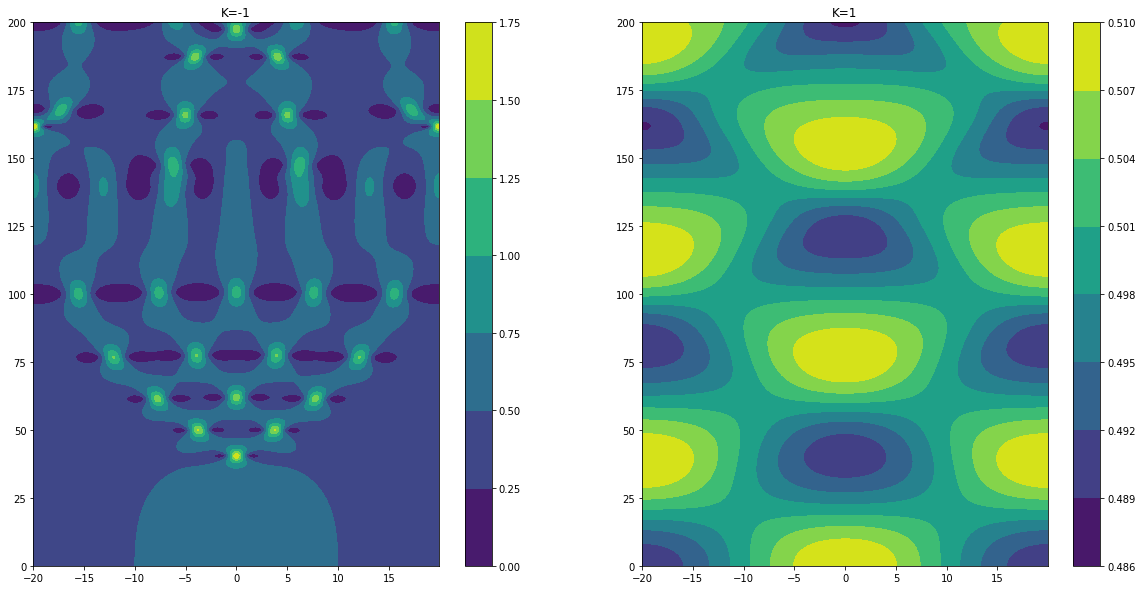

In [56]:
[xx,tt] = np.meshgrid(dom_x, dom_t)


fig1 = plt.figure(figsize = (20,10))
ax1 = fig1.add_subplot(121)
ax1.set_title("K=-1")   
cf1 = ax1.contourf(xx,tt,np.transpose(amp_psi_neg))

ax2 = fig1.add_subplot(122)
ax2.set_title("K=1")
cf2 = ax2.contourf(xx,tt,np.transpose(amp_psi_pos))

fig1.colorbar(cf1, ax=ax1)
fig1.colorbar(cf2, ax=ax2)

## Nonlinear Schrodinger - Part 2

## Code

Let's define our analytical solution

In [9]:
def psi_perig(dom_x,t) :
    return (1 - 4*(1 + 2j*t)/(1 + 4*dom_x**2 + 4*t**2))*np.exp(1j*t)

We will just modify a bit the code to allow to choose our starting time.

In [84]:
N = 2**10
L = 6
dt = 0.01
K = -1
t_0 = -5
t = 5

dom_x = np.arange(-int(L/2),int(L/2), L/N)
dom_k = np.linspace(-N/2,(N/2)-1, N)
dom_t = np.linspace(t_0, t, int((t-t_0)/dt)+1)

psi = np.zeros((N, int((t-t_0)/dt)+1), dtype= complex)
psi[:,0] = psi_perig(dom_x, t_0)

In [85]:
for i in range(len(dom_t)-1):
   g = get_g(dt, K, psi[:,i])
   gk = get_gk(g)
   psi_kn = psi_k_plus(gk, dt, dom_k, L)
   psi_xn = psi_plus(psi_kn)
   psi[:,i+1] = psi_xn
   
amp_psi = np.abs(psi)

psi_t = np.zeros((N,int((t-t_0)/dt)+1),dtype=complex)

for i,t in zip(range(len(dom_t)),dom_t) :
    psi_t[:,i] = psi_perig(dom_x,t)

amp_psi_t = np.abs(psi_t)

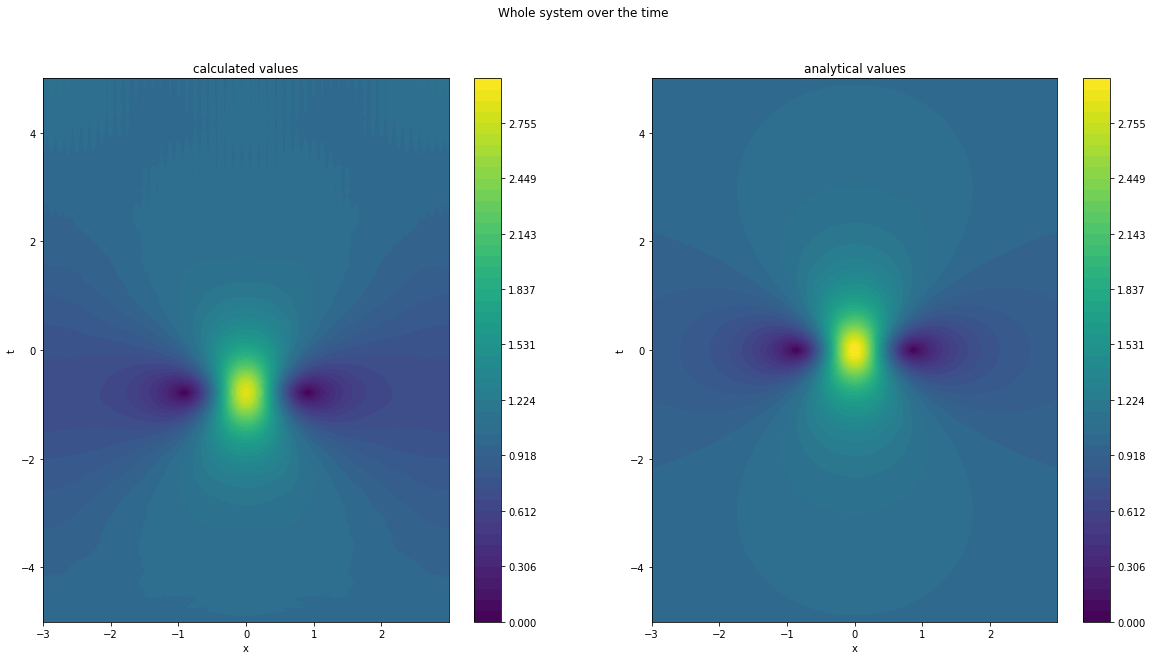

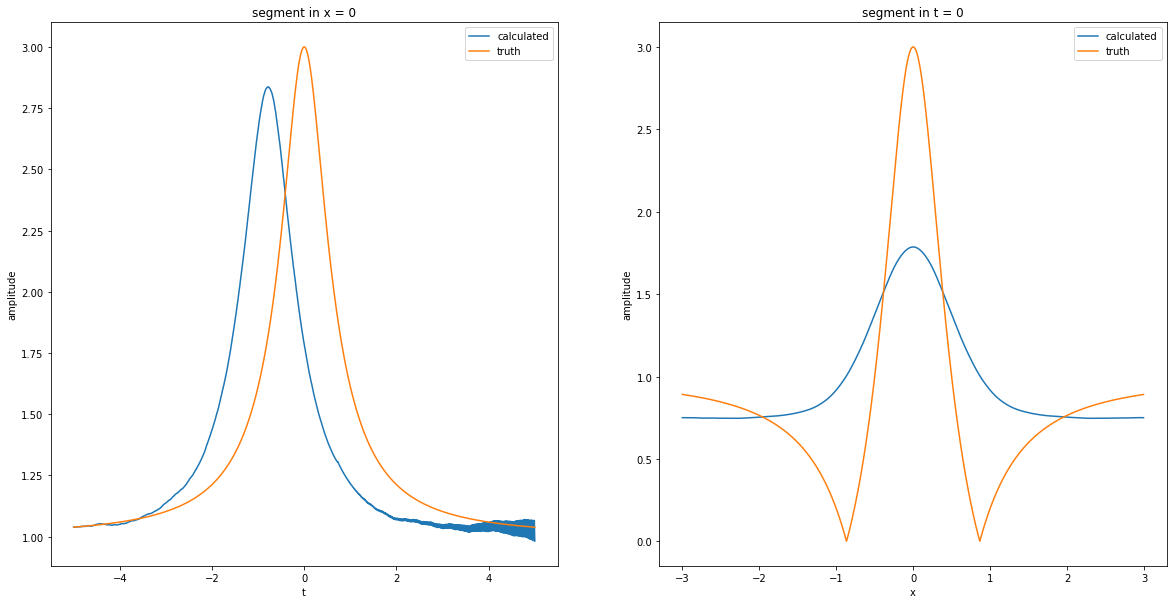

In [86]:
[xx,tt] = np.meshgrid(dom_x, dom_t)

fig1 = plt.figure(figsize = (20,10))
fig1.suptitle('Whole system over the time')
ax1 = fig1.add_subplot(121)
ax1.set_title("calculated values")
cf1 = ax1.contourf(xx,tt,np.transpose(amp_psi),levels = np.linspace(0,np.max(amp_psi_t)))
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf1, ax=ax1)

ax2 = fig1.add_subplot(122)
cf2 = ax2.contourf(xx,tt,np.transpose(amp_psi_t),levels = np.linspace(0,np.max(amp_psi_t)))
ax2.set_title("analytical values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf2, ax=ax2)

fig2 = plt.figure(figsize = (20,10))
ax1 = fig2.add_subplot(121)
ax1.plot(dom_t,amp_psi[int(len(dom_x)/2),:], label = "calculated")
ax1.plot(dom_t,amp_psi_t[int(len(dom_x)/2),:], label = "truth")
ax1.set_title("segment in x = 0")
plt.xlabel('t')
plt.ylabel('amplitude')
plt.legend()

ax2 = fig2.add_subplot(122)
ax2.plot(dom_x,amp_psi[:,int(len(dom_t)/2)], label = "calculated")
ax2.plot(dom_x,amp_psi_t[:,int(len(dom_t)/2)], label = "truth")
ax2.set_title("segment in t = 0")
plt.xlabel('x')
plt.ylabel('amplitude')
plt.legend()



plt.show()

In [64]:
N = 2**11
L = 12

dom_x = np.arange(-int(L/2),int(L/2), L/N)
dom_k = np.linspace(-N/2,(N/2)-1, N)

psi = np.zeros((N, int((t-t_0)/dt)+1), dtype= complex)
psi[:,0] = psi_perig(dom_x, t_0)

In [65]:
for i in range(len(dom_t)-1):
   g = get_g(dt, K, psi[:,i])
   gk = get_gk(g)
   psi_kn = psi_k_plus(gk, dt, dom_k, L)
   psi_xn = psi_plus(psi_kn)
   psi[:,i+1] = psi_xn
   
amp_psi = np.abs(psi)

psi_t = np.zeros((N,int((t-t_0)/dt)+1),dtype=complex)

for i,t in zip(range(len(dom_t)),dom_t) :
    psi_t[:,i] = psi_perig(dom_x,t)

amp_psi_t = np.abs(psi_t)

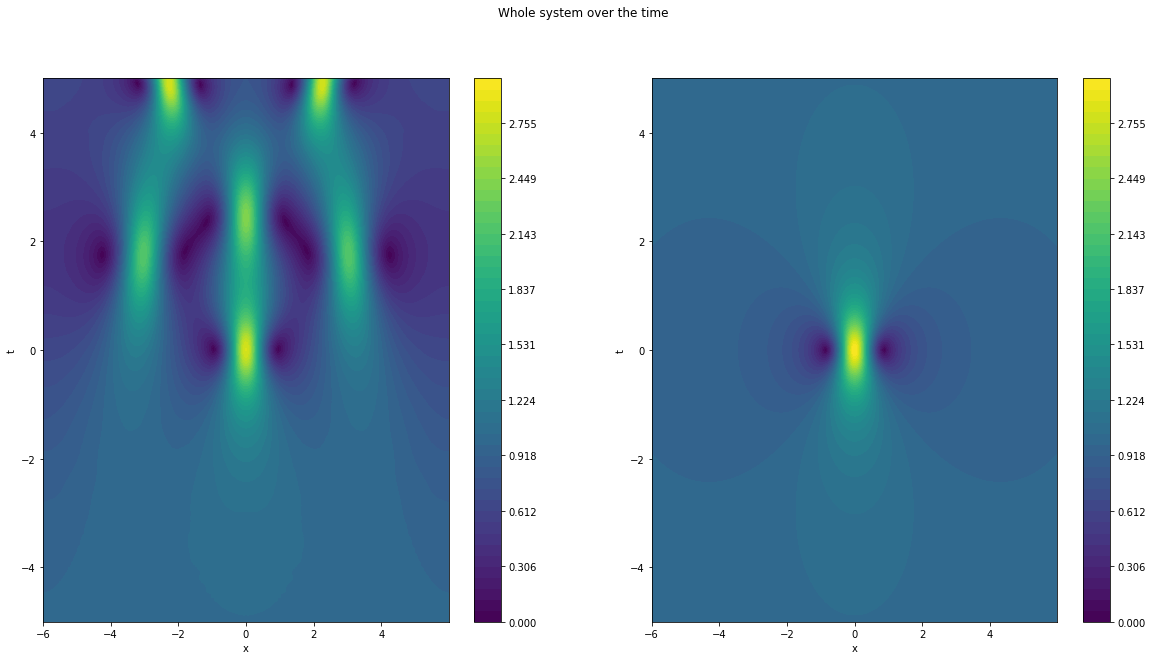

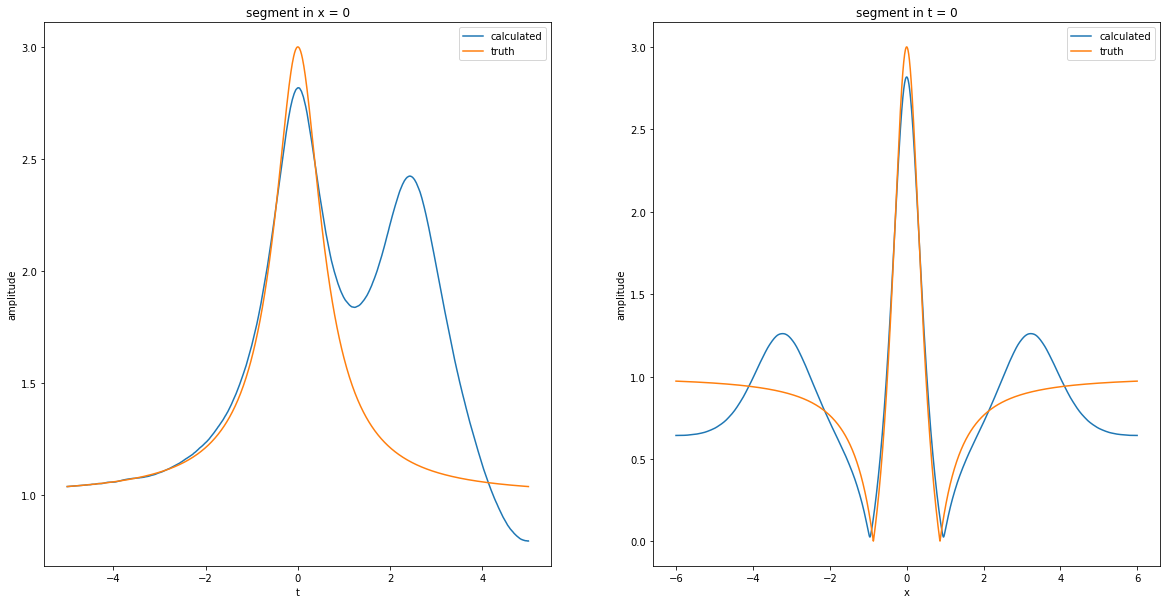

In [66]:
[xx,tt] = np.meshgrid(dom_x, dom_t)

fig1 = plt.figure(figsize = (20,10))
fig1.suptitle('Whole system over the time')
ax1 = fig1.add_subplot(121)
cf1 = ax1.contourf(xx,tt,np.transpose(amp_psi),levels = np.linspace(0,np.max(amp_psi_t)))
ax1.set_title("calculated values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf1, ax=ax1)

ax2 = fig1.add_subplot(122)
cf2 = ax2.contourf(xx,tt,np.transpose(amp_psi_t),levels = np.linspace(0,np.max(amp_psi_t)))
ax2.set_title("analytical values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf2, ax=ax2)

fig2 = plt.figure(figsize = (20,10))
ax1 = fig2.add_subplot(121)
ax1.plot(dom_t,amp_psi[int(len(dom_x)/2),:], label = "calculated")
ax1.plot(dom_t,amp_psi_t[int(len(dom_x)/2),:], label = "truth")
ax1.set_title("segment in x = 0")
plt.xlabel('t')
plt.ylabel('amplitude')
plt.legend()

ax2 = fig2.add_subplot(122)
ax2.plot(dom_x,amp_psi[:,int(len(dom_t)/2)], label = "calculated")
ax2.plot(dom_x,amp_psi_t[:,int(len(dom_t)/2)], label = "truth")
ax2.set_title("segment in t = 0")
plt.xlabel('x')
plt.ylabel('amplitude')
plt.legend()



plt.show()

In [74]:
N = 2**12
L = 24

dom_x = np.arange(-int(L/2),int(L/2), L/N)
dom_k = np.linspace(-N/2,(N/2)-1, N)

psi = np.zeros((N, int((t-t_0)/dt)+1), dtype= complex)
psi[:,0] = psi_perig(dom_x, t_0)

In [75]:
for i in range(len(dom_t)-1):
   g = get_g(dt, K, psi[:,i])
   gk = get_gk(g)
   psi_kn = psi_k_plus(gk, dt, dom_k, L)
   psi_xn = psi_plus(psi_kn)
   psi[:,i+1] = psi_xn
   
amp_psi = np.abs(psi)

psi_t = np.zeros((N,int((t-t_0)/dt)+1),dtype=complex)

for i,t in zip(range(len(dom_t)),dom_t) :
    psi_t[:,i] = psi_perig(dom_x,t)

amp_psi_t = np.abs(psi_t)

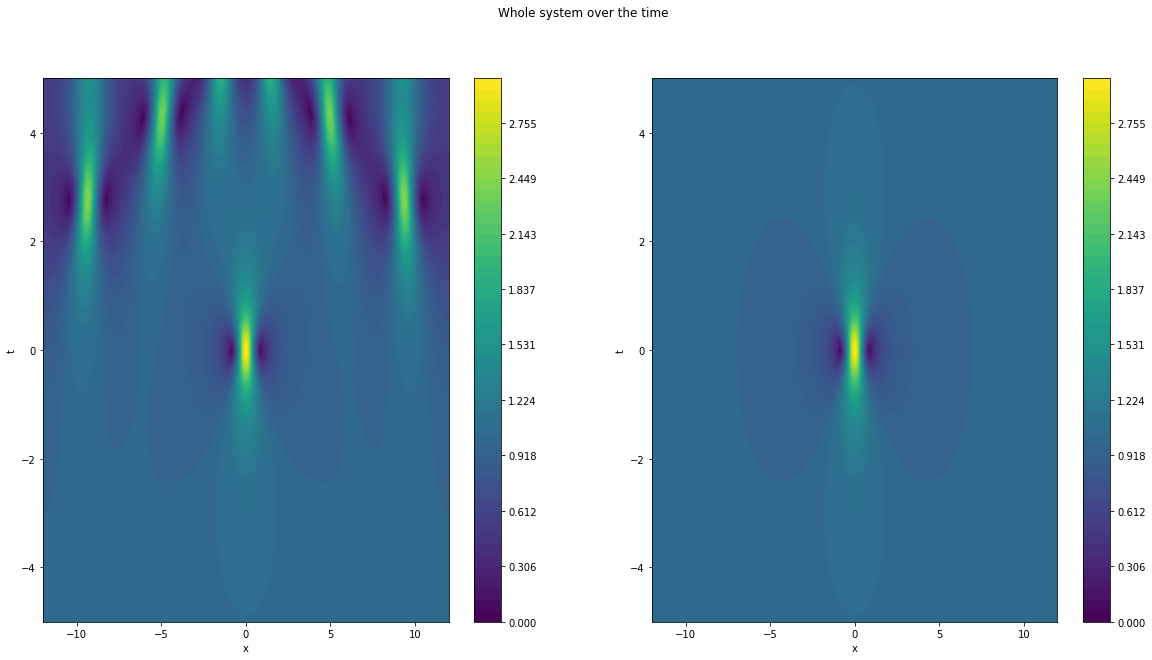

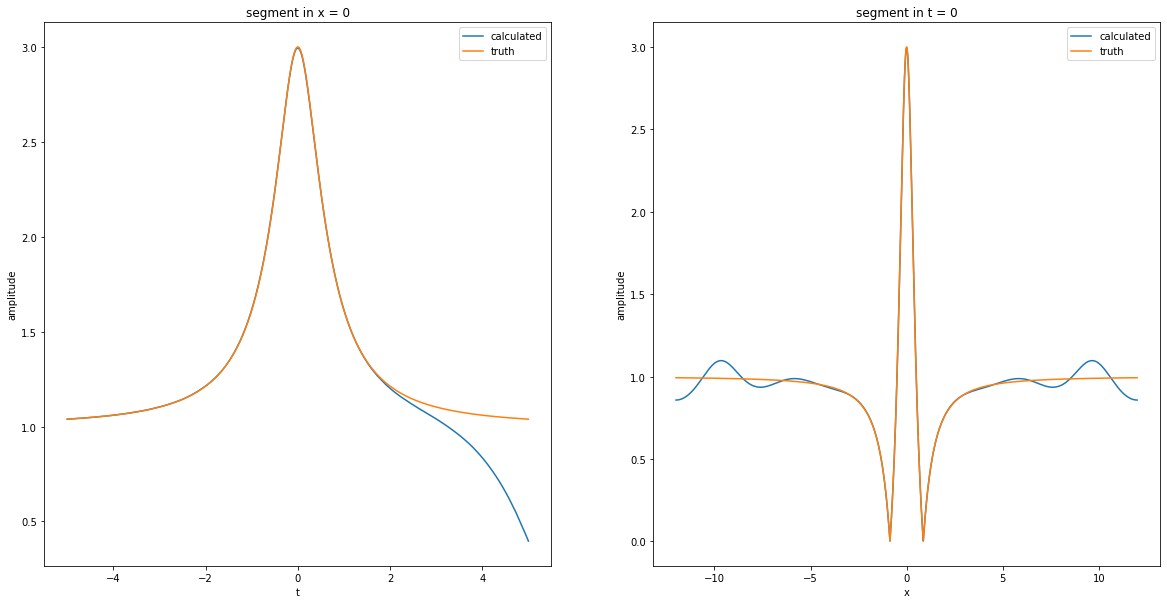

In [76]:
[xx,tt] = np.meshgrid(dom_x, dom_t)

fig1 = plt.figure(figsize = (20,10))
fig1.suptitle('Whole system over the time')
ax1 = fig1.add_subplot(121)
cf1 = ax1.contourf(xx,tt,np.transpose(amp_psi),levels = np.linspace(0,np.max(amp_psi_t)))
ax1.set_title("calculated values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf1, ax=ax1)

ax2 = fig1.add_subplot(122)
cf2 = ax2.contourf(xx,tt,np.transpose(amp_psi_t),levels = np.linspace(0,np.max(amp_psi_t)))
ax2.set_title("analytical values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf2, ax=ax2)

fig2 = plt.figure(figsize = (20,10))
ax1 = fig2.add_subplot(121)
ax1.plot(dom_t,amp_psi[int(len(dom_x)/2),:], label = "calculated")
ax1.plot(dom_t,amp_psi_t[int(len(dom_x)/2),:], label = "truth")
ax1.set_title("segment in x = 0")
plt.xlabel('t')
plt.ylabel('amplitude')
plt.legend()

ax2 = fig2.add_subplot(122)
ax2.plot(dom_x,amp_psi[:,int(len(dom_t)/2)], label = "calculated")
ax2.plot(dom_x,amp_psi_t[:,int(len(dom_t)/2)], label = "truth")
ax2.set_title("segment in t = 0")
plt.xlabel('x')
plt.ylabel('amplitude')
plt.legend()



plt.show()

In [77]:
N = 2**13
L = 48

dom_x = np.arange(-int(L/2),int(L/2), L/N)
dom_k = np.linspace(-N/2,(N/2)-1, N)

psi = np.zeros((N, int((t-t_0)/dt)+1), dtype= complex)
psi[:,0] = psi_perig(dom_x, t_0)

In [78]:
for i in range(len(dom_t)-1):
   g = get_g(dt, K, psi[:,i])
   gk = get_gk(g)
   psi_kn = psi_k_plus(gk, dt, dom_k, L)
   psi_xn = psi_plus(psi_kn)
   psi[:,i+1] = psi_xn
   
amp_psi = np.abs(psi)

psi_t = np.zeros((N,int((t-t_0)/dt)+1),dtype=complex)

for i,t in zip(range(len(dom_t)),dom_t) :
    psi_t[:,i] = psi_perig(dom_x,t)

amp_psi_t = np.abs(psi_t)

C:\Users\Quentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


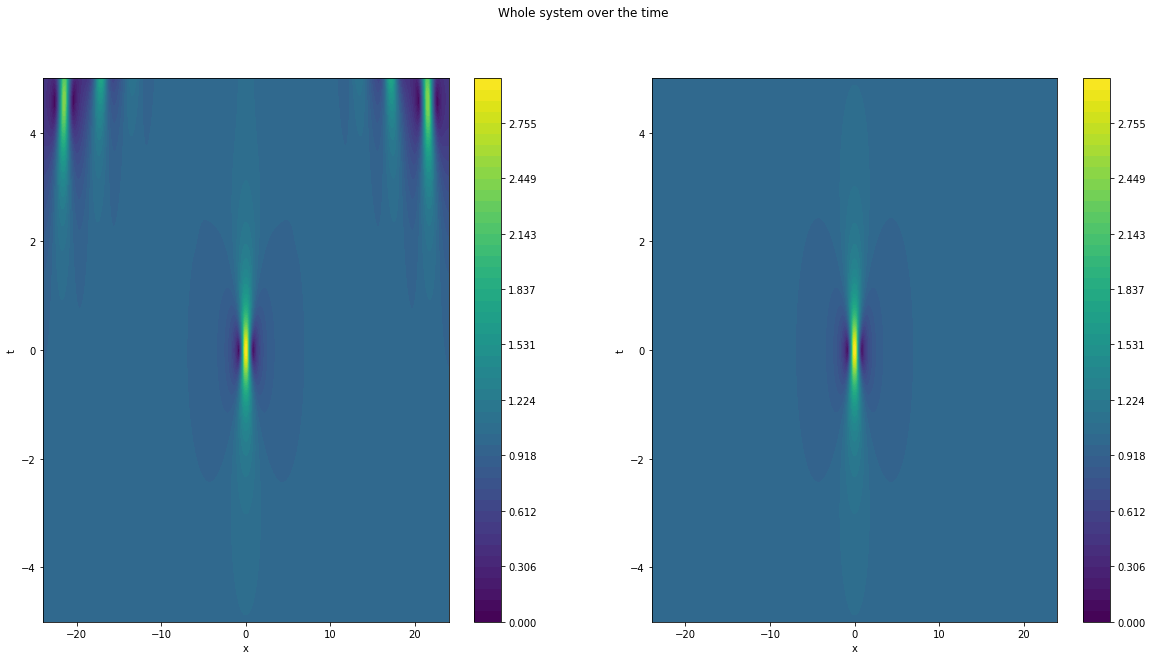

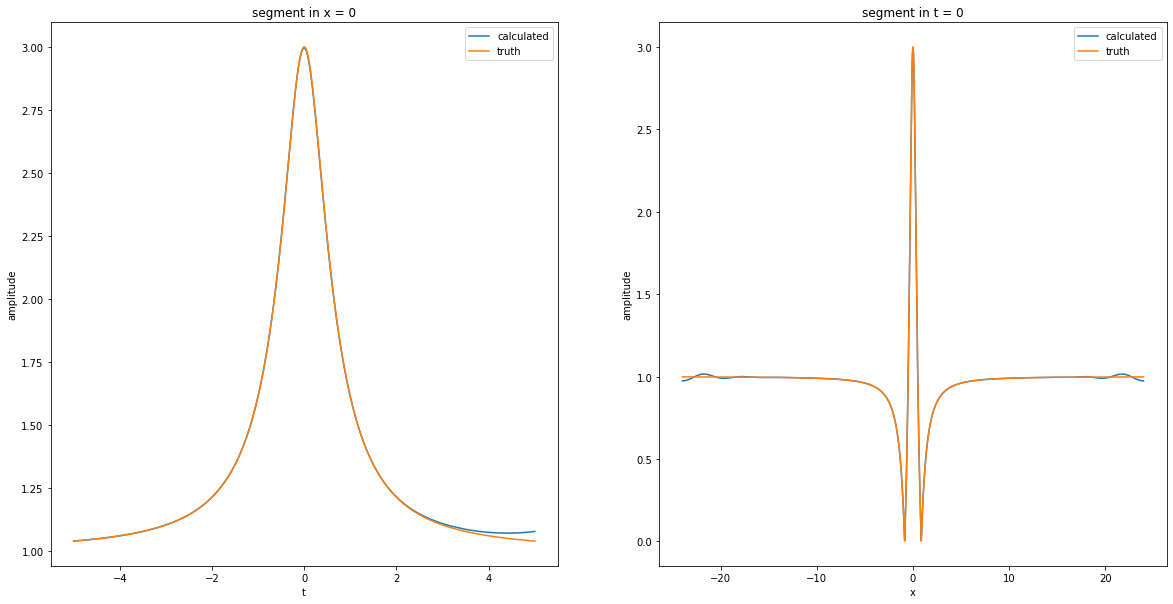

In [79]:
[xx,tt] = np.meshgrid(dom_x, dom_t)

fig1 = plt.figure(figsize = (20,10))
fig1.suptitle('Whole system over the time')
ax1 = fig1.add_subplot(121)
cf1 = ax1.contourf(xx,tt,np.transpose(amp_psi),levels = np.linspace(0,np.max(amp_psi_t)))
ax1.set_title("calculated values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf1, ax=ax1)

ax2 = fig1.add_subplot(122)
cf2 = ax2.contourf(xx,tt,np.transpose(amp_psi_t),levels = np.linspace(0,np.max(amp_psi_t)))
ax2.set_title("analytical values")
plt.xlabel('x')
plt.ylabel('t')
fig1.colorbar(cf2, ax=ax2)

fig2 = plt.figure(figsize = (20,10))
ax1 = fig2.add_subplot(121)
ax1.plot(dom_t,amp_psi[int(len(dom_x)/2),:], label = "calculated")
ax1.plot(dom_t,amp_psi_t[int(len(dom_x)/2),:], label = "truth")
ax1.set_title("segment in x = 0")
plt.xlabel('t')
plt.ylabel('amplitude')
plt.legend()

ax2 = fig2.add_subplot(122)
ax2.plot(dom_x,amp_psi[:,int(len(dom_t)/2)], label = "calculated")
ax2.plot(dom_x,amp_psi_t[:,int(len(dom_t)/2)], label = "truth")
ax2.set_title("segment in t = 0")
plt.xlabel('x')
plt.ylabel('amplitude')
plt.legend()



plt.show()